In [1]:
# Starting with the usual imports
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import time

In [2]:
# Load images
image1 = cv2.imread("RIT.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("RIT2.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT and SURF detectors
sift = cv2.SIFT_create()
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Detect and compute keypoints and descriptors for both SIFT and SURF
def detect_and_compute(detector, image):
    start = time.time()
    keypoints, descriptors = detector.detectAndCompute(image, None)
    end = time.time()
    return keypoints, descriptors, end - start

# SIFT detection
kp1_sift, des1_sift, time_sift1 = detect_and_compute(sift, image1)
kp2_sift, des2_sift, time_sift2 = detect_and_compute(sift, image2)

# SURF detection
kp1_surf, des1_surf, time_surf1 = detect_and_compute(surf, image1)
kp2_surf, des2_surf, time_surf2 = detect_and_compute(surf, image2)

# Print timings
print(f"SIFT detection time (image 1): {time_sift1:.4f} s")
print(f"SURF detection time (image 1): {time_surf1:.4f} s")

# Visualize keypoints
def draw_keypoints(image, keypoints, title):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Draw SIFT keypoints
draw_keypoints(image1, kp1_sift, "SIFT Keypoints Image 1")
draw_keypoints(image2, kp2_sift, "SIFT Keypoints Image 2")

# Draw SURF keypoints
draw_keypoints(image1, kp1_surf, "SURF Keypoints Image 1")
draw_keypoints(image2, kp2_surf, "SURF Keypoints Image 2")

# Match descriptors with FLANN based matcher
def match_features(des1, des2):
    index_params = dict(algorithm=0, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return good_matches

# Matching and displaying matches
good_matches_sift = match_features(des1_sift, des2_sift)
good_matches_surf = match_features(des1_surf, des2_surf)

# Visualize matches for SIFT
img_matches_sift = cv2.drawMatches(image1, kp1_sift, image2, kp2_sift, good_matches_sift, None)
plt.imshow(img_matches_sift)
plt.title("SIFT Matches")
plt.axis("off")
plt.show()

# Visualize matches for SURF
img_matches_surf = cv2.drawMatches(image1, kp1_surf, image2, kp2_surf, good_matches_surf, None)
plt.imshow(img_matches_surf)
plt.title("SURF Matches")
plt.axis("off")
plt.show()


AttributeError: module 'cv2' has no attribute 'xfeatures2d'

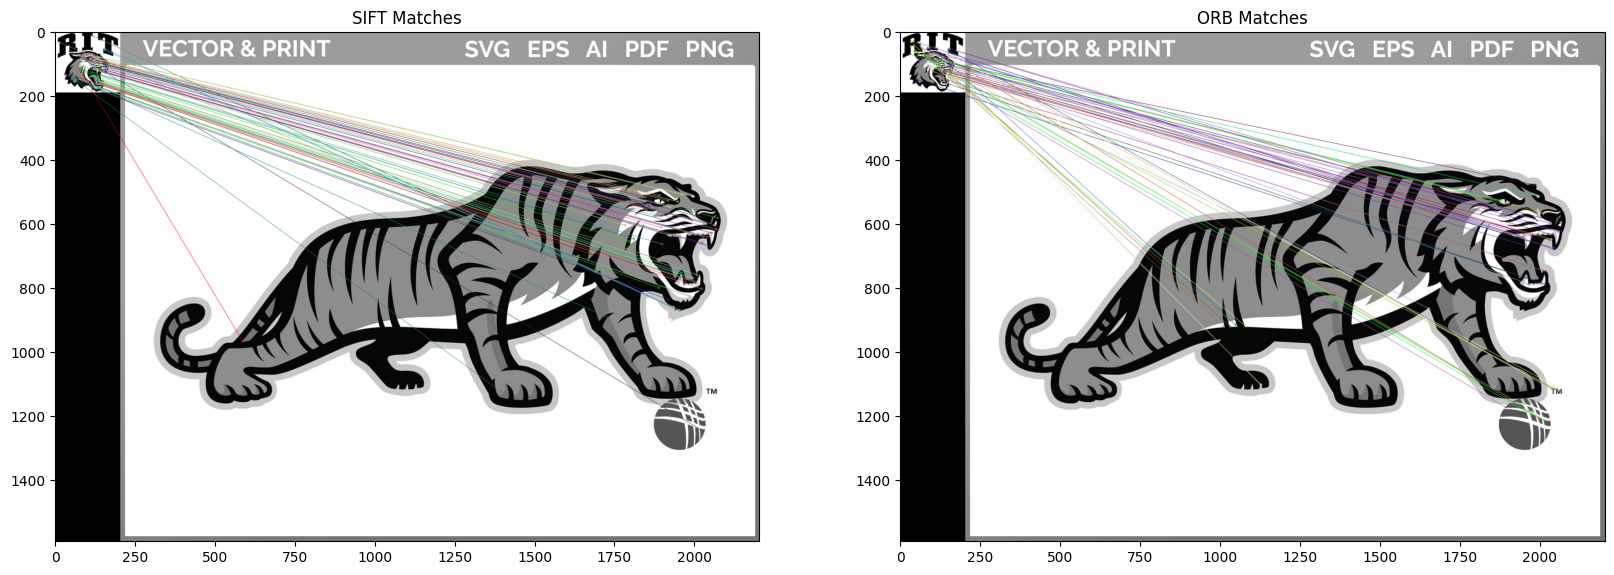

In [3]:
# Load images
image1 = cv2.imread("RIT.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("RIT2.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect and compute keypoints and descriptors with SIFT
kp1_sift, des1_sift = sift.detectAndCompute(image1, None)
kp2_sift, des2_sift = sift.detectAndCompute(image2, None)

# Detect and compute keypoints and descriptors with ORB
kp1_orb, des1_orb = orb.detectAndCompute(image1, None)
kp2_orb, des2_orb = orb.detectAndCompute(image2, None)

# Using FLANN-based matcher for SIFT
# FLANN parameters for SIFT
index_params = dict(algorithm=1, trees=5)  # KD-tree
search_params = dict(checks=50)           # Recursions

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_sift = flann.knnMatch(des1_sift, des2_sift, k=2)

# Apply ratio test to keep good matches in SIFT
good_matches_sift = []
for m, n in matches_sift:
    if m.distance < 0.7 * n.distance:
        good_matches_sift.append(m)

# Brute-Force Matcher for ORB (since descriptors are binary)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf.match(des1_orb, des2_orb)

# Sort matches by distance for ORB (optional)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw matches for both SIFT and ORB
sift_img_matches = cv2.drawMatches(image1, kp1_sift, image2, kp2_sift, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
orb_img_matches = cv2.drawMatches(image1, kp1_orb, image2, kp2_orb, matches_orb[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results side-by-side
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title("SIFT Matches")
plt.imshow(sift_img_matches)

plt.subplot(1, 2, 2)
plt.title("ORB Matches")
plt.imshow(orb_img_matches)

plt.show()

In [4]:
import cv2

# Load images in grayscale
image1 = cv2.imread("RIT.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("RIT2.jpg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT or SURF detector
sift = cv2.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400) # Uncomment if using SURF

# Detect and compute keypoints and descriptors
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

# Using FLANN-based matcher
index_params = dict(algorithm=1, trees=5) # FLANN index for KD-tree
search_params = dict(checks=50)           # Number of times the tree is recursively traversed

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
result = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
cv2.imshow("Matches", result)
cv2.waitKey(0)
cv2.destroyAllWindows()